In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [2]:
#some general functions we might need
def check_stationarity(series):
    adf_result = adfuller(series)
    #reject non-stationary
    print(f'ADF p-value: {adf_result[1]:.4f}')
    kpss_result = kpss(series)
    #reject stationary
    print(f"KPSS p-value: {kpss_result[1]:.4f}")
    

In [3]:
#Data pre-processing
raw_pdf = pd.read_csv('dataKCx.csv')

opening_time = pd.Timestamp('06:55:00').strftime("%H:%M:%S")
raw_pdf.loc[raw_pdf['tradingphase'] == 'OPENING AUCTION','time'] = opening_time
closing_time = pd.Timestamp('15:30:00').strftime("%H:%M:%S")
raw_pdf.loc[raw_pdf['tradingphase'] == 'CLOSING AUCTION','time'] = closing_time

c_pdf = raw_pdf[(raw_pdf['tradingphase'] == 'CONTINUOUS') | (raw_pdf['tradingphase'] == 'OPENING AUCTION')]


raw_pdf['date_time'] = raw_pdf['date'] + 'T' + raw_pdf['time']
raw_pdf.set_index('date_time')

#make data more stationary
check_stationarity(raw_pdf['volume'])

#using rate instead of volumes to make data more stationary
raw_pdf.sort_index(inplace=True)
raw_pdf['volume_yesterday'] = raw_pdf['volume'].shift(104)
raw_pdf['rate'] = np.log(raw_pdf['volume'] / raw_pdf['volume_yesterday'])
rate_pdf = raw_pdf[~raw_pdf.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
check_stationarity(rate_pdf['rate'])

rate_pdf['rate_diff'] = (rate_pdf['rate'] - rate_pdf['rate'].shift(1))
check_stationarity(rate_pdf['rate_diff'].dropna())

#conclusion: rate is good enough



ADF p-value: 0.0000
KPSS p-value: 0.0100


/tmp/ipykernel_187175/710319425.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/home/gael/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF p-value: 0.0000


/tmp/ipykernel_187175/710319425.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series)
/tmp/ipykernel_187175/3495504940.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_pdf['rate_diff'] = (rate_pdf['rate'] - rate_pdf['rate'].shift(1))


KPSS p-value: 0.1000
ADF p-value: 0.0000
KPSS p-value: 0.1000


/tmp/ipykernel_187175/710319425.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series)


In [155]:
frac_test = 0.2
n_test = math.ceil(len(rate_pdf['date'].drop_duplicates())*0.2)


657

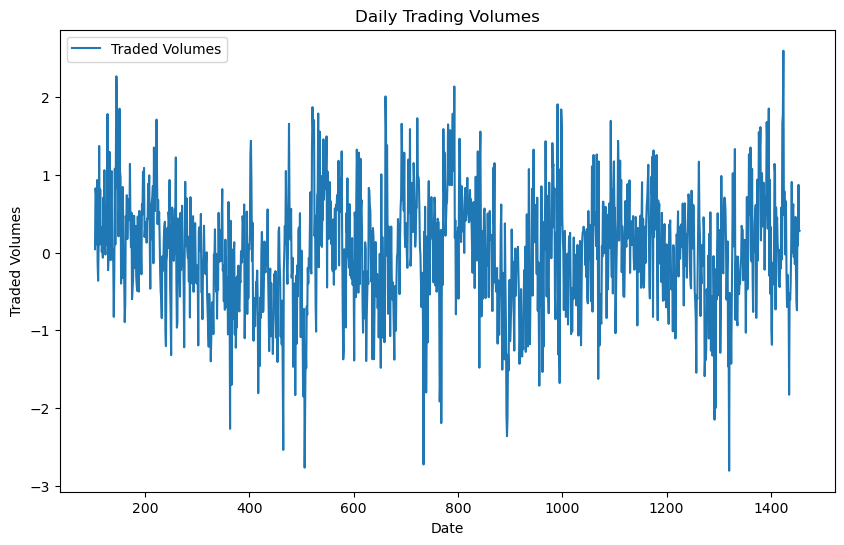

In [5]:
#plot all the data
ndays = 14
short_pdf = raw_pdf[:104*ndays]
plt.figure(figsize=(10, 6))
plt.plot(short_pdf.index, short_pdf['rate'], label='Traded Volumes')
plt.xlabel('Date')
plt.ylabel('Traded Volumes')
plt.title('Daily Trading Volumes')
plt.legend()
plt.show()

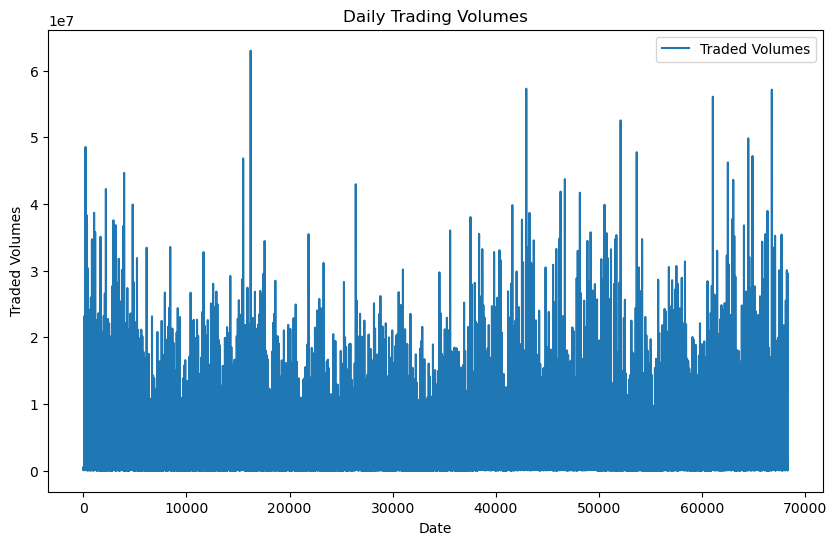

In [102]:

#plot all the data
plt.figure(figsize=(10, 6))
plt.plot(raw_pdf.index, raw_pdf['volume'], label='Traded Volumes')
plt.xlabel('Date')
plt.ylabel('Traded Volumes')
plt.title('Daily Trading Volumes')
plt.legend()
plt.show()

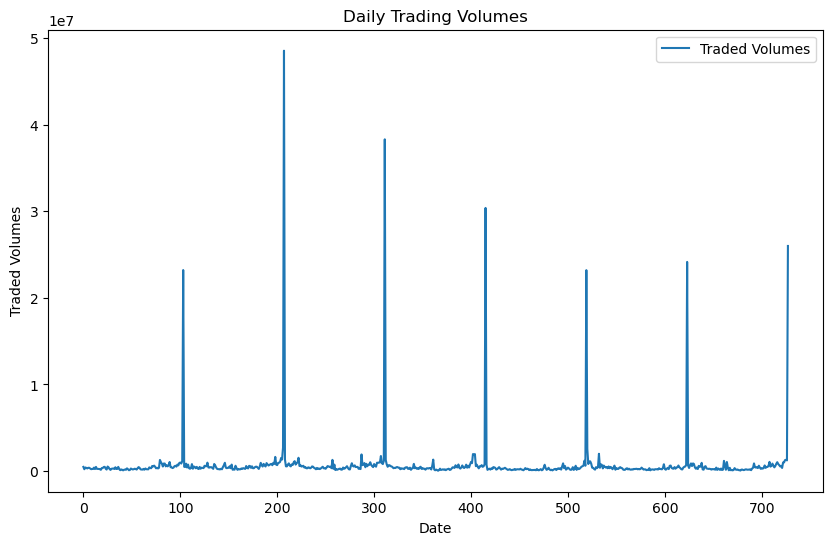

In [54]:
#plot subset of the data
ndays = 7
recent = raw_pdf.head(104*ndays)
plt.figure(figsize=(10, 6))
plt.plot(recent.index, recent['volume'], label='Traded Volumes')
plt.xlabel('Date')
plt.ylabel('Traded Volumes')
plt.title('Daily Trading Volumes')
plt.legend()
plt.show()

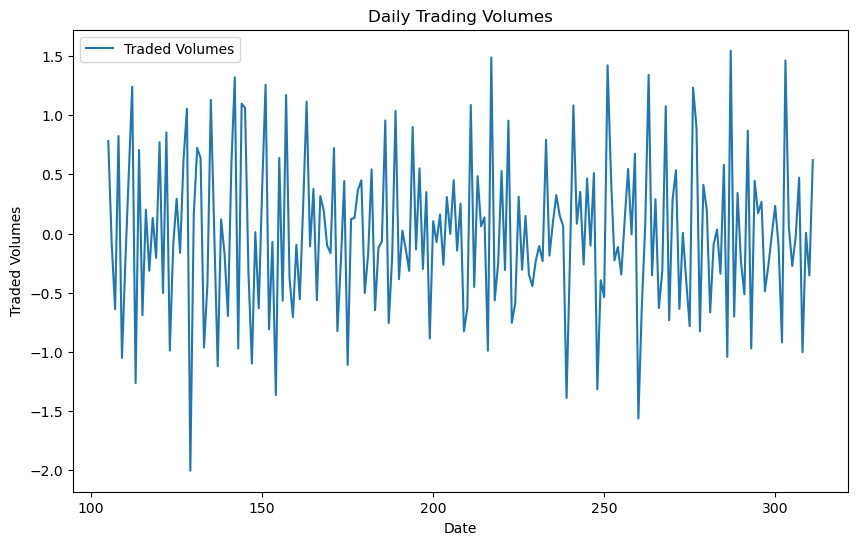

In [12]:
#plot subset of the data
ndays = 2
recent = rate_pdf.head(104*ndays)
plt.figure(figsize=(10, 6))
plt.plot(recent.index, recent['rate_diff'], label='Traded Volumes')
plt.xlabel('Date')
plt.ylabel('Traded Volumes')
plt.title('Daily Trading Volumes')
plt.legend()
plt.show()

In [63]:
adf_result = adfuller(c_pdf['volume'])
kpss_result = kpss(c_pdf['volume'])
print(f"ADF p-value: {adf_result[1]:.4f}")
print(f"KPSS p-value: {kpss_result[1]:.4f}")

ADF p-value: 0.0000
KPSS p-value: 0.0100


/tmp/ipykernel_4155/800423058.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(c_pdf['volume'])


In [88]:
raw_pdf.sort_index(inplace=True)
raw_pdf['volume_tomorrow'] = raw_pdf['volume'].shift(-104)
raw_pdf['rate'] = raw_pdf['volume_tomorrow'] / raw_pdf['volume']

In [140]:
adf_result = adfuller(rate_pdf['rate'][1:])
kpss_result = kpss(rate_pdf['rate'][1:])
print(f"ADF p-value: {adf_result[1]:.4f}")
print(f"KPSS p-value: {kpss_result[1]:.4f}")

rate_pdf['rate_diff'] = rate_pdf['rate'] - rate_pdf['rate'].shift(1)

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Not stationary')

check_stationarity(rate_pdf['rate_diff'].dropna())

/tmp/ipykernel_4155/1757677532.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(rate_pdf['rate'][1:])
/tmp/ipykernel_4155/1757677532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_pdf['rate_diff'] = rate_pdf['rate'] - rate_pdf['rate'].shift(1)


ADF p-value: 0.0000
KPSS p-value: 0.1000
ADF Statistic: -46.92390627070294
p-value: 0.0
Stationary


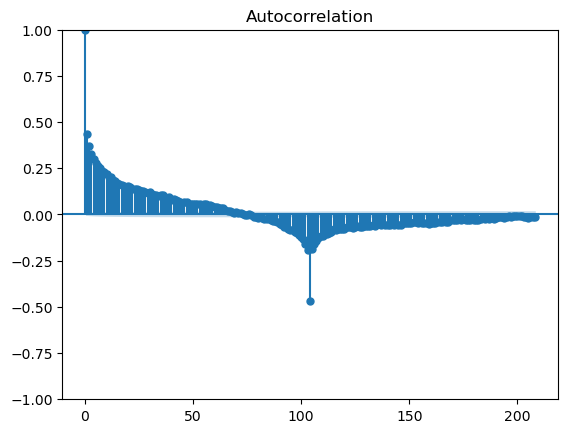

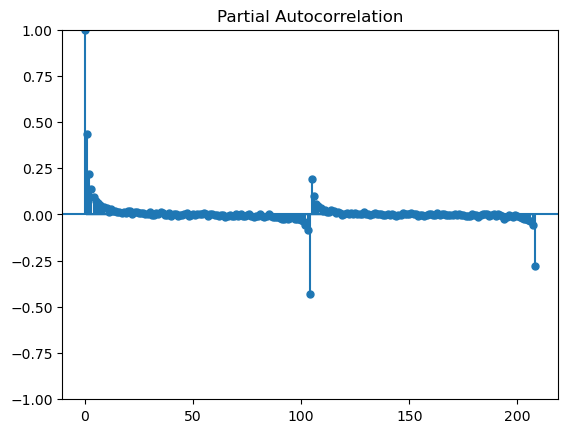

In [13]:
plot_acf(rate_pdf['rate'].dropna(), lags=208)
plot_pacf(rate_pdf['rate'].dropna(), lags=208)
plt.show()

In [33]:
#Split data into train and test
size = int(len(rate_pdf) * 0.8)
X_train, X_test = rate_pdf[0:size], raw_pdf[size:]

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.arima.model import ARIMA
  
model = ARIMA(X_train['rate'],  
                order = (104, 0, 104))
  
result = model.fit() 
result.summary() 

/home/gael/miniconda3/envs/KP_tech_interview/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gael/miniconda3/envs/KP_tech_interview/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/gael/miniconda3/envs/KP_tech_interview/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

NameError: name 'X_train' is not defined

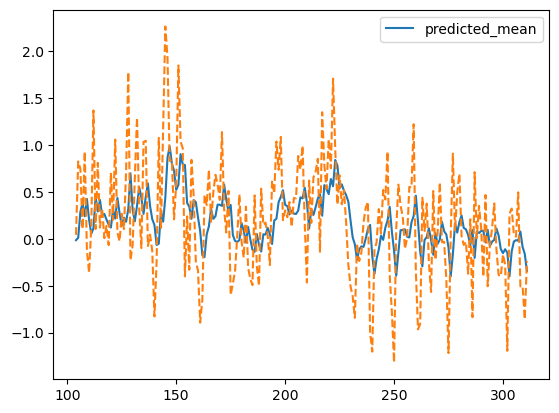

In [32]:
train_prediction[:104*ndays].plot(legend=True)
plt.plot(X_train[:104*ndays].index, X_train[:104*ndays]['rate'], label='Traded Volumes', linestyle = "dashed")

In [89]:
raw_pdf.head(105)

,Unnamed: 0,date,time,volume,tradingphase,date_time,volume_tomorrow,rate
0,1,2020-03-30,06:55:00,466939.0,OPENING AUCTION,2020-03-30T06:55:00,487107.0,1.043192
1,2,2020-03-30,07:00:00,199240.0,CONTINUOUS,2020-03-30T07:00:00,454251.0,2.279919
2,3,2020-03-30,07:05:00,399928.0,CONTINUOUS,2020-03-30T07:05:00,843307.0,2.108647
3,4,2020-03-30,07:10:00,355929.0,CONTINUOUS,2020-03-30T07:10:00,395693.0,1.111719
4,5,2020-03-30,07:15:00,290592.0,CONTINUOUS,2020-03-30T07:15:00,736841.0,2.535655
...,...,...,...,...,...,...,...,...
100,101,2020-03-30,15:15:00,967469.0,CONTINUOUS,2020-03-30T15:15:00,1494565.0,1.544820
101,102,2020-03-30,15:20:00,853784.0,CONTINUOUS,2020-03-30T15:20:00,1314129.0,1.539182
102,103,2020-03-30,15:25:00,1115332.0,CONTINUOUS,2020-03-30T15:25:00,2695456.0,2.416730
103,104,2020-03-30,15:30:00,23214580.0,CLOSING AUCTION,2020-03-30T15:30:00,48561438.0,2.091851
